<div style="font-size: 20px">
1.	Based on the first and second law, derive the Fundamental Property Equation (FPE) for pure component and explain what it means for a definition of the internal energy. What will change in this equation if it will be written for mixture of components?

<div style="font-size: 20px">
2. A thermodynamic property characterizing the phase state is shown in the figure below.

    a.	Which thermodynamic property is show in the figure?
    
    b.	What is changing between (a) to (d)? How is it changing?
    
    c.	Name each thermodynamic state related to each figure. 
    
    d.	Explain why this thermodynamic property is mostly used to describe phase behavior 


<img style="float: left;" src="Gibbs.jpg" width="100%">

<div style="font-size: 20px">
One of the main applications of nonlinear least squares is nonlinear regression or curve fitting. That is by given pairs ${(t_i,y_i) i=1,...,n}$ estimate parameters $X$ defining a nonlinear function $\varphi(t;X)$, assuming the model:
\begin{equation}
y_i = \varphi(t_i;X) + \epsilon_i
\end{equation}
where $\epsilon_i$ is the measurement (observation) errors. In the least-squares estimation we search $X$ as the solution of the following optimization problem:
\begin{equation}
\frac{1}{2}\sum_{i=1}^{n}(\varphi(t_i;X) - y_i)^2\rightarrow\min_x
\end{equation}
Such formulation is intuitive and convinient from mathematical point of view. From the probabilistic point of view the least-squares solution is known to be the maximum likelihood estimate, provided that all $\epsilon_i$ are independent and normally distributed random variables.

So theoretically it is not optimal when $\epsilon_i$ have distribution other than normal. Although in engineering practice it is usally not important, i.e. if errors behave as some reasonable random variables with zero mean a result of least-squares estimation will be satisfactory.

<div style="font-size: 20px">
3. Please use the sublimation data we provide in the table to fit Antoine equation. In this exercise, a small noise is added in the data.

In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.optimize import least_squares

# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#         'size': 16,
#         }

# # 1) sublimation curve, units in the table: T-Kelvin, P-mmHg
# data_sub = ??

# # 2) add a small perturbation 
# error = np.random.random((data_sub['T'].size,len(data_sub.dtypes)))
# noise = 0.01
# data = data_sub + noise * error

# plt.figure(figsize=(15, 7))
# plt.semilogy(data['T'],data['P'],'ro')
# plt.semilogy(data_sub['T'],data_sub['P'],'b--')
# plt.tick_params(labelsize=15)
# plt.xlabel('Temperature(K)', fontdict=font)
# plt.ylabel('Pressure(mmHg)', fontdict=font)
# plt.legend(['Training data','Raw data'])
# plt.show()

SyntaxError: invalid syntax (<ipython-input-3-b2e6373bac91>, line 13)

In [ ]:
# # Define model parameters
# T_min = -100          # celsius
# T_max =   0           # celsius
# T = np.linspace(T_min, T_max, 100)

In [ ]:
# # Define the function computing residuals for least-squares minimization:
# def fobj(C, T, P):
#     return C[0] - C[1]/ (T + C[2] - 273.15) - np.log10(P)

In [ ]:
# # Use all ones as the initial estimate.
# C = np.ones(3)

# # Run robust least squares with loss='soft_l1', set f_scale to 0.1 
# # which means that inlier residuals are approximately lower than 0.1.
# res_robust = least_squares(fobj, C, loss='soft_l1', f_scale=0.1, args=(data['T'], data['P']))

# print('Antoine coefficients : A = %0.2f, B = %0.2f, C = %0.2f'%(res_robust.x[0],res_robust.x[1],res_robust.x[2]))

In [ ]:
# # visualize your results
# p_robust = 10**(res_robust.x[0] - res_robust.x[1]/(res_robust.x[2] + T))

# plt.figure(figsize=(15, 8))
# plt.semilogy(data['T'],data['P'],'ro', label = 'training data')
# plt.semilogy(T + 273.15,p_robust,'b-', label = 'robust least square')
# plt.tick_params(labelsize=15)
# plt.xlabel('Temperature(K)', fontdict=font)
# plt.ylabel('Pressure(mmHg)', fontdict=font)
# plt.legend()
# plt.show()

<img style="float: left;" src="homework1.jpg" width="100%">

<img style="float: left;" src="homework2.jpg" width="100%">

<img style="float: left;" src="homework3.jpg" width="100%">

<img style="float: left;" src="homework4.jpg" width="100%">

<img style="float: left;" src="homework5.jpg" width="100%">

<div style="font-size: 20px">
Note: We assume ideal mixtures, which means $\gamma_i$=$\Phi_i$=1

In [8]:
import numpy as np
C1 = np.array([13.96,2826.26,224.1])     # Antoine coefficients
C2 = np.array([13.9926,3295.12,217.55])  # Antoine coefficients
P = 90      # pressure
y = np.linspace(0,1,100)   # composition range
T1 = 10     # min T
T2 = 200    # max T
tol = 1e-7  # tolerance  

In [9]:
def obj(T, y):
    return 1/P - y/(10**(C1[0] - C1[1]/(T + C1[2]))) - (1 - y)/(10**(C2[0] - C2[1]/(T + C2[2])))

In [10]:
def bisection(a,b,y):
    while (np.abs(a-b)>tol):
        T = (a + b)/2
        T_left = obj(a, y)
        T_right = obj(b, y)
        T_mid = obj(T, y)
        if (T_left*T_mid<0):
            b = T
        else:
            a = T
    return T

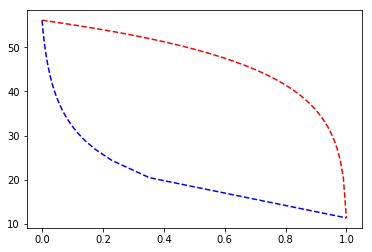

In [11]:
Tb = np.zeros(len(y))
x = np.zeros(len(y))
for i in range (len(y)):
    Tb[i] = bisection(T1,T2,y[i])
    Psat = 10**(C1[0] - C1[1]/(Tb[i] + C1[2]))
    x[i] = y[i] * P / Psat

import matplotlib.pyplot as plt

plt.figure()
plt.plot(y,Tb,'r--',x,Tb,'b--')
plt.show()